<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/constant_flowrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/sbooeshaghi/colosseum.git

Cloning into 'colosseum'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 513 (delta 164), reused 152 (delta 58), pack-reused 212
Receiving objects: 100% (513/513), 11.30 MiB | 30.78 MiB/s, done.
Resolving deltas: 100% (265/265), done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick


plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv("/content/colosseum/data/experiment_2.txt", sep="\t")

columns = {"Collection Time (s)": "time",
           "Experiment":	"experiment",
           "Total weight [mg]": "total_weight",
           "Fluid weight [mg]":	"fluid_weight"}

df = df.rename(columns=columns)
df["fluid_vol"] = df["fluid_weight"]/1000

In [5]:
df.head()

,time,experiment,total_weight,fluid_weight,fluid_vol
0,2,1,1348.2,110.22,0.11022
1,4,1,1477.7,239.72,0.23972
2,6,1,1561.2,323.22,0.32322
3,8,1,1619.7,381.72,0.38172
4,10,1,1785.7,547.72,0.54772


In [6]:
experiments = np.unique(df["experiment"].values)
tpts = np.arange(2, 32, 2)
means = df.groupby(["time"])["fluid_vol"].mean()

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tpts, means)

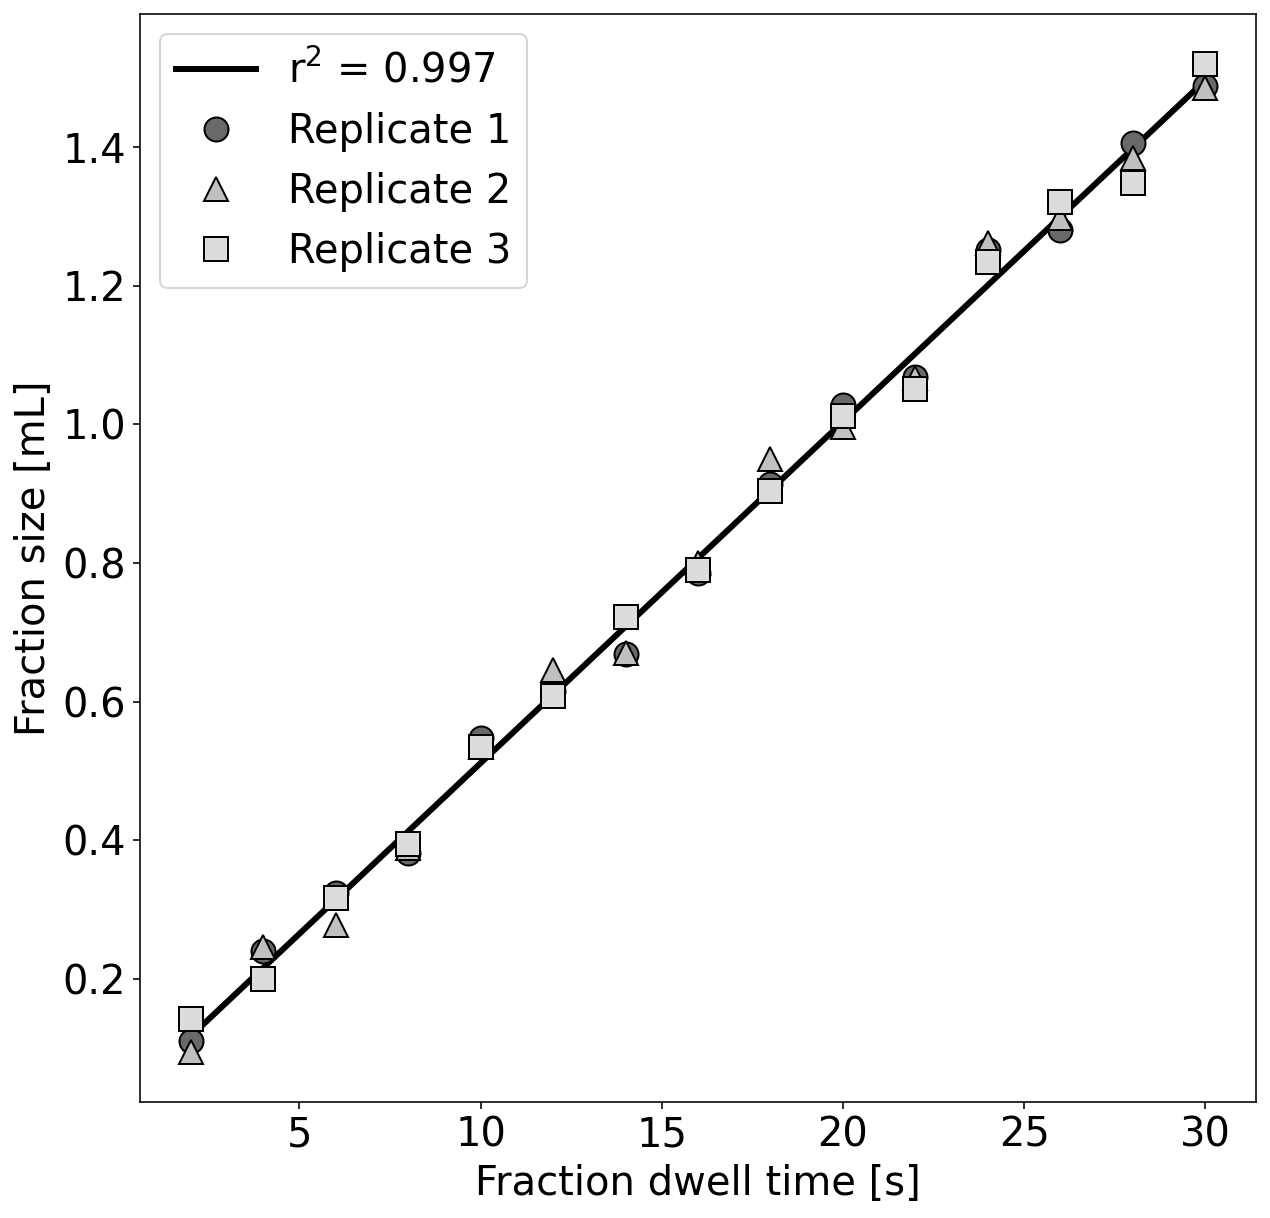

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(tpts, intercept + slope*tpts, 'black', label='r$^2$ = {:.3f}'.format(r_value**2), linewidth=3)


shapes = ["o", "^", "s"]
colors = ["dimgrey", "silver", "gainsboro"]

for idx, exp in enumerate(experiments):
    tmp = df[df["experiment"] == exp]
    cumsum = tmp["fluid_vol"].values.cumsum()
    
    ax.plot(tmp["time"].values, tmp["fluid_vol"].values, label="Replicate {}".format(idx+1),linestyle='None', marker=shapes[idx], color=colors[idx], markeredgecolor='black', markersize=12)
    
ax.set(**{
    "xlabel": "Fraction dwell time [s]",
    "ylabel": "Fraction size [mL]"
    })


ax.legend()

fig.savefig("fraction_dwelltime.png", bbox_inches='tight', dpi=300)

plt.show()